In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Reading and Contouring Gridded Data
One of the most common file types for gridded data in the Earth System Science domain is netCDF or network common data format. This is a binary style file that can't be read by just "opening" the file with word or excel. In order to read these files, which contain not only the data values, but additional data describing coordinate variables (like latitude and longitude) and other metadata (e.g., information about the data) like units of data variables and coordinate reference system information.

There are a number of different Python modules that can read in netCDF files, but there is one that rises to the top for its ability to read and utilize the coordinate and attribute information to help us do our work. This module is called Xarray and is one of the most useful modules to learn if you are going to work in Python with multi-dimensional gridded datasets.

Xarray Documentation: http://xarray.pydata.org/en/stable/

Additionally, when plotting two dimensional data (e.g., those data files that have latitude and longitude coordinates associaed with them) we want to be able to produce contour plots that can give an indication of how those variables change over the domain space. Matplotlib has additional plotting functionality to that which we have previously discussed to be able to do contour and contour-filled plots.

Matplotlib Contour Plots: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html

In this notebook, we'll:
* work to read in some topographic data using Xarray
* learn how to find out more about our data
* work to subset our data in meaningful ways
* learn to plot contours of a 2D field

## Xarray

There is a Python module designed to work with multi-dimensional datasets, like model output, that captures not only the data arrays, but the associated data with it. For example, if we have temperature data from across the globe and for a number of forecast hours, we'll need a couple of arrays to help understand the coordinate variables (e.g., time, latitude, longitude). Xarray describes this set of arrays and coordinate variable arrays as a "dataset", where each variable is considered a "dataarray".

**Dataset**

Contains:
- data variable arrays
- coordinate variable arrays
- attributes (other metadata)

**DataArray**

A variable with associated coordinate information (lat, lon)

Temperature[times, lat, lon]
> times for this variable

> latitude for this variable

> longitude for this variable

http://xarray.pydata.org/en/stable/

This module is built on top of Numpy, so underlying the data variable arrays and the coordinate variable arrays are Numpy arrays that can be subset in the same way as traditional Numpy arrays. Additionally, many of the same methods that you could perform on a Numpy Array you can perform on an Xarray DataArray. Xarray has also built additional methods for making subsetting and working with your data much more intuitive and user friendly (once you get to know how to use it).

## Reading Data

There are a couple of different I/O functions available in Xarray, but the most commonly used and needed one for working with netCDF data is the `open_dataset` function. In general, properly formatted netCDF files will only require the name (and path) to the file you want to read. A typical read function should be formatted as:

```python
ds = xr.open_dataset('my_data_file.nc')
```

Where `my_data_file.nc` is a netCDF filename that is located in your current working directly. This works similar to the path/filename that you would use for `np.loadtxt`, which was covered in previous notebooks.

In [2]:
# Open our datafile
ds = xr.open_dataset('ETOPO1_gdal.nc')

### What is in our Data Object?

Reading our data in using Xarray gives us a new data object called the Xarray Dataset, which contains at least one Xarray DataArray. To get a glimpse of this data we can either print the variable or just type it into a cell and run that cell. The benefit of not using the print function here is that the Jupyter Notebook environment will give us a nicely formatted header information output that is easy to read. 

In [3]:
ds

<xarray.Dataset>
Dimensions:     (lat: 10801, lon: 21601)
Coordinates:
  * lon         (lon) float64 -180.0 -180.0 -180.0 -179.9 ... 180.0 180.0 180.0
  * lat         (lat) float64 90.0 89.98 89.97 89.95 ... -89.97 -89.98 -90.0
Data variables:
    topography  (lat, lon) float64 ...

In [4]:
type(ds)

xarray.core.dataset.Dataset

From this view of the data we get the information about our data variables that are contained within our dataset, the associated corrdinate variables and the dimensions (shape) of our dataset. Additionally, if there are any global attributes, they would also appear in this output.

### Dataset Information
How do we know/access the data contained in our Xarray data object?

What Xarray gives us is a dictionary-like object that we can access the different pieces using dictionary-like calls, or through a method call (if the variable name is formatted in a manner that allows it). Let's first get a list of the data variable keys from our Dataset. The Python method call for a dictionary-like object to get the variable keys (the keys that are part of the key-value pairs in a dictionary) we would use the following:

```python
ds.keys()
```

To get a more succinct list of the keys we would want to use:

```python
list(ds.keys())
```
Of course, the `ds` variable would change to be whatever your Xarray Dataset variable you created when you read in your data.

In [5]:
list(ds.keys())

['topography']

So we have one data variable from our dataset called topography. We can access this variable through two different, but equivalent, methods:

Dictionary-like call:
```python
ds['topography']
```

Xarray method call:
```python
ds.topography
```

In [6]:
ds.topography

<xarray.DataArray 'topography' (lat: 10801, lon: 21601)>
[233312401 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -180.0 -180.0 -180.0 -179.9 ... 180.0 180.0 180.0
  * lat      (lat) float64 90.0 89.98 89.97 89.95 ... -89.95 -89.97 -89.98 -90.0

Let's work to save our variable off to its own object name

In [7]:
topo = ds.topography
print(type(topo))

<class 'xarray.core.dataarray.DataArray'>


In [8]:
topo.shape

(10801, 21601)

In [9]:
topo

<xarray.DataArray 'topography' (lat: 10801, lon: 21601)>
[233312401 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -180.0 -180.0 -180.0 -179.9 ... 180.0 180.0 180.0
  * lat      (lat) float64 90.0 89.98 89.97 89.95 ... -89.95 -89.97 -89.98 -90.0

## Subset to particular area
In our work with Numpy we were left to do all of the work ourselves for working to subset our data array by finding/using the proper index values to get back what we desire. Xarray has made this a much less painful process by giving us a selection method that works to subset by single values or a range of values to give use back just the data we need/want.

The `.sel` method works on any Xarray DataArray variable and you may subset along any dimension variable that is associated with it. If we had a `temperature` variable with coordinate variables of `lat` and `lon`, we could subset the data for just the Continental United States (CONUS) by:
```python
ds.temperature.sel(lat=slice(20, 40), lon=slice(360-140, 360-55)
```
Note: The `slice()` function is the formal function for slicing. The following are equivalent `a[start:stop:step]` and `a[slice(start, stop, step)]`. The use of the `:` only works when making the direct slice on a Numpy array-like object.

The above dataset assumed that the longitude values were in the format of 0 to 360, so I used a little math computation in the slice function to calculate what the appropriate value would be since I think more commonly in a degrees West mentality (e.g., negative longitude values over the CONUS).

Let's slice out data to only use our topography data for the Big Island of Hawaii (18.5 to 20; -157 to -154E). One important note is that we have to know how our latitude and longitude coordinate variables are organized. Where do they start, are the longitude values from 0 to 360 or from -180 to 180, or some other range?

Let's start by taking a look at those coordinate data variables to better understand them.

In [10]:
ds.lat

<xarray.DataArray 'lat' (lat: 10801)>
array([ 90.      ,  89.983333,  89.966667, ..., -89.966667, -89.983333,
       -90.      ])
Coordinates:
  * lat      (lat) float64 90.0 89.98 89.97 89.95 ... -89.95 -89.97 -89.98 -90.0

In [11]:
ds.lon

<xarray.DataArray 'lon' (lon: 21601)>
array([-180.      , -179.983333, -179.966667, ...,  179.966667,  179.983333,
        180.      ])
Coordinates:
  * lon      (lon) float64 -180.0 -180.0 -180.0 -179.9 ... 180.0 180.0 180.0

Now lets work to select only the subset of our topography data for the lat/lon ranges desired.

In [12]:
topo_hawaii = topo.sel(lat=slice(20.5, 18.5), lon=slice(-157, -154))

## Plotting Contours

Since we have a two dimensional datasets, a commone way for visualizing the data is to plot contours of equal value. Since we have some topography data, we'll be able to plot the contours of the terrain height over the Big Island of Hawaii.

```python
ax.contour(x, y, Z, levels, colors='black')
```

There are typically a minimum of three data objects needed to contour your data correctly including the x-coordinate variable, the y-coordinate variable, and the contour variable (Z in the example above). There are a number of different keyword arguments that you can set to alter the contour plot:
* `alpha`
    - This attribute will make the contour lines more transparent the closer the alpha value is to zero (with 1 as completely opaque)
* `linewidths`
    - This attribute will set the linewidth value of the contour lines. Note this is similar to line plots, but is plural
* `linestyles`
    - This attribute will set the linestyle value of the contour lines. Note this is similar to line plots, but is plural
* `colors`
    - This attribute allows you to change the color of the contours

Note: By default if a color is set, negative contours will use a dashed linestyle and the positive contours will use a solid linestyle.

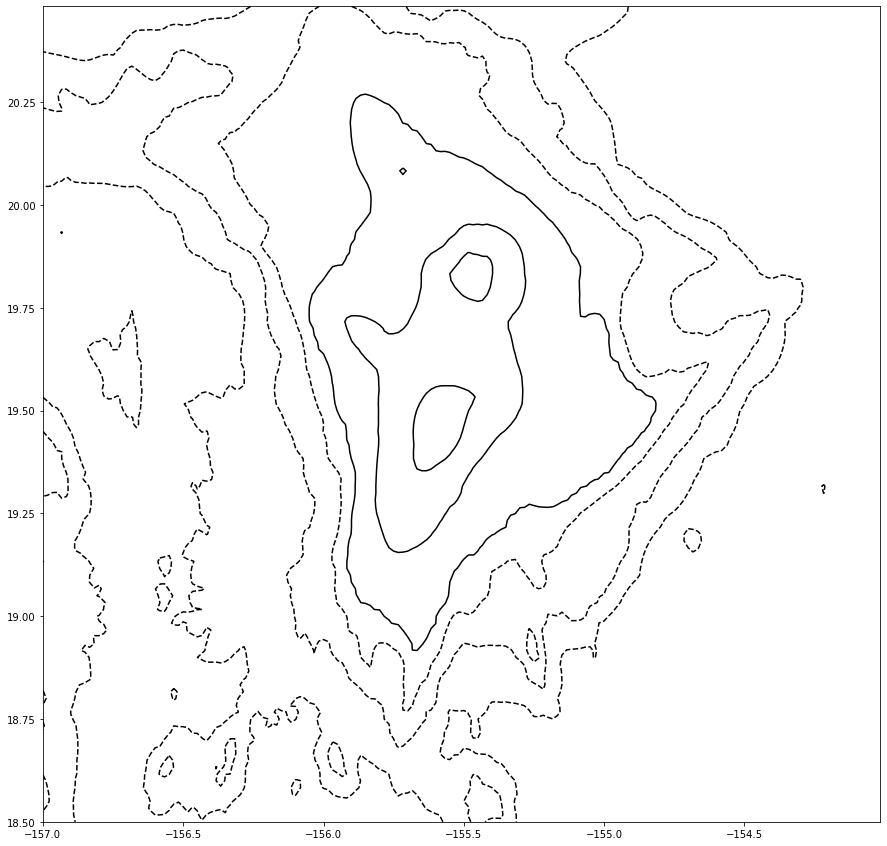

In [13]:
plt.figure(1, figsize=(15, 15))
ax = plt.subplot(111)

ax.contour(topo_hawaii.lon, topo_hawaii.lat, topo_hawaii, colors='black')

plt.show()

### Set Contour Levels and Label Contours
We can set the contour values instead of having Matplotlib choose them for you by adding a list or array of contour values directly after the topographic values.

To add contour labels, we first need to give our contours a variable name (e.g., `cs`) so that we can call that in the our `clabel` method for plotting.

```python
cs = ax.contour(x, y, Z, levels, colors='black')

ax.clabel(cs, fmt='%d')
```

Additionally, we set the keyword `fmt` to `'%d'` to have our contour labels be integer values.

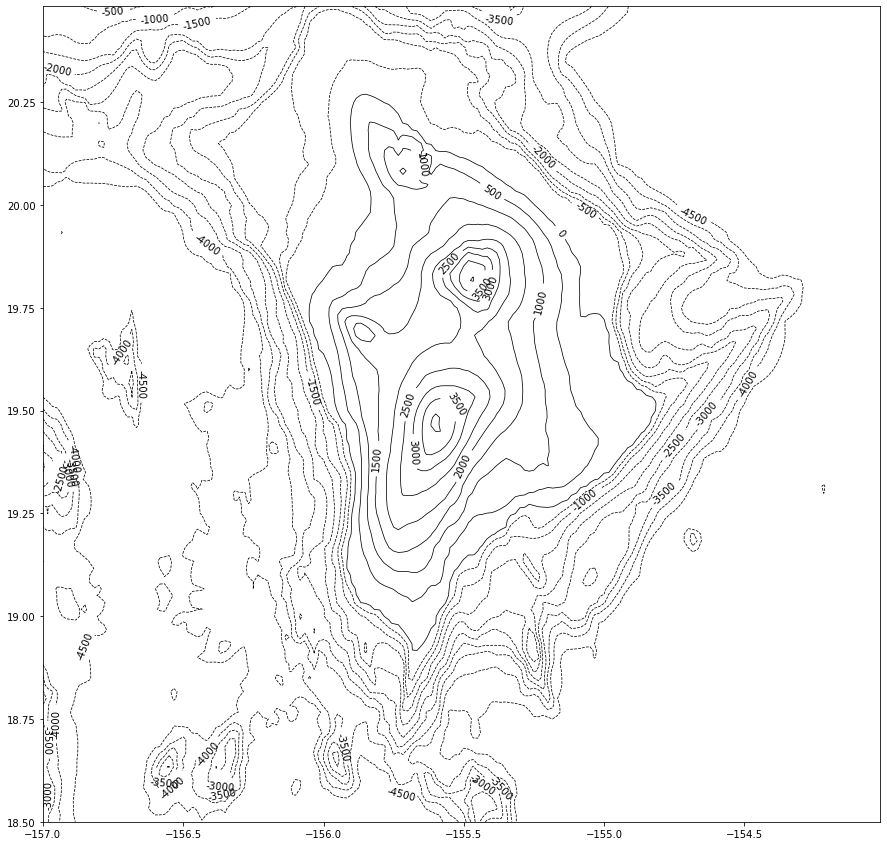

In [14]:
plt.figure(1, figsize=(15, 15))
ax = plt.subplot(111)

cs = ax.contour(topo_hawaii.lon, topo_hawaii.lat, topo_hawaii,
                np.arange(-4500, 4500, 500), colors=['black'],
                linewidths=0.75)
ax.clabel(cs, fmt='%d')

plt.show()

Use different colors (and colormaps) for different contours.

* Use the `Blues` colormap for contours less than zero
* Use black for the zero contour
* Use the `copper_r` colormap for contours greater than or equal to 500

Matplotlib Colormap Reference: https://matplotlib.org/stable/gallery/color/colormap_reference.html

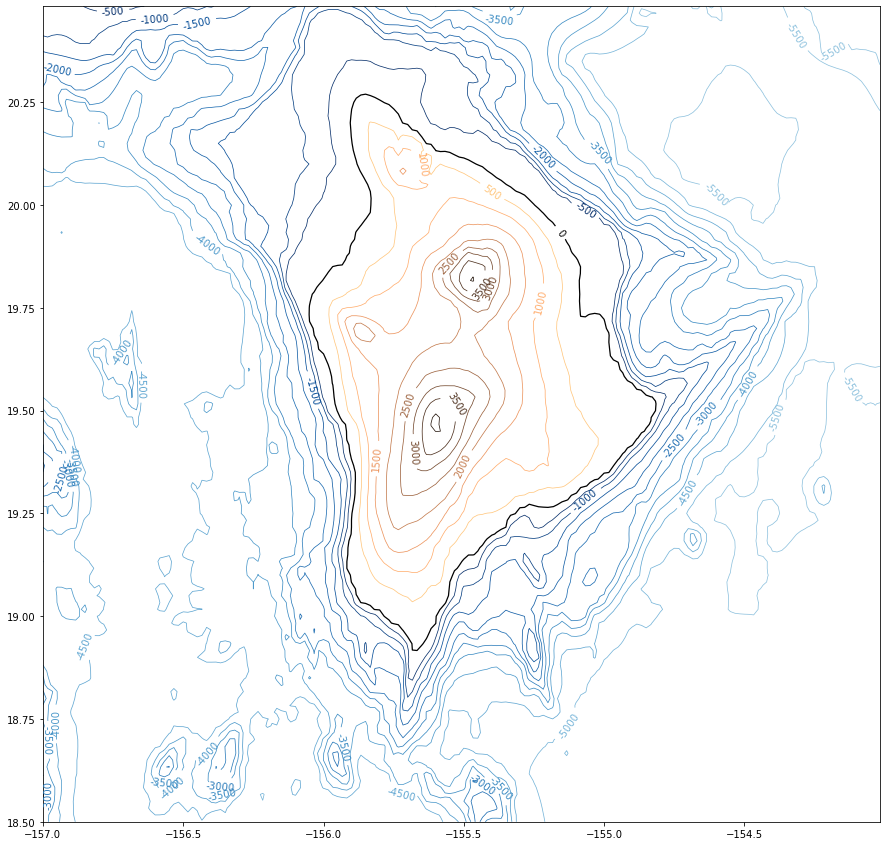

In [15]:
plt.figure(1, figsize=(15, 15))
ax = plt.subplot(111)

cs = ax.contour(topo_hawaii.lon, topo_hawaii.lat, topo_hawaii,
                np.arange(-9000, 0, 500), cmap=plt.cm.Blues,
                linewidths=0.75)
plt.clabel(cs, fmt='%d')

cs2 = ax.contour(topo_hawaii.lon, topo_hawaii.lat, topo_hawaii,
                 0, colors='black',
                 linewidths=1.25)
plt.clabel(cs2, fmt='%d')

cs3 = ax.contour(topo_hawaii.lon, topo_hawaii.lat, topo_hawaii,
                 np.arange(500, 5000, 500), cmap=plt.cm.copper_r,
                 linewidths=0.75)
plt.clabel(cs3, fmt='%d')

plt.show()

## Finding the Maximum Value

An Xarray DataArray has a `where` method that works similar to the Numpy where function. The benefit of doing this through an Xarray DataArray is that you can get the coordinate values of the location of the maximum value right along with the actual maximum value of the data variable. Set the keyword `drop` to be `True` to get the desired result.

In [16]:
max_topo = topo_hawaii.where(topo_hawaii == topo_hawaii.max(), drop=True)[0][0]

In [17]:
max_topo

<xarray.DataArray 'topography' ()>
array(4079.)
Coordinates:
    lon      float64 -155.6
    lat      float64 19.48

## Plotting Max/Min Values - Scatter and Text Plotting

To plot a marker at a given location we can use the `scatter` method:

```python
ax.scatter(x, y, s, marker='d')
```
Here x is the x-coordinate location, y is the y-coordinate location, s is the size of the marker, and the keyword marker can be set to any of the valid Matplotlib markers.

Matplotlib Scatter Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

Matplotlib Markers: https://matplotlib.org/stable/api/markers_api.html

To plot text at a given location on the plot we can use the `text` method:

```python
ax.text(x, y, string)
```
Here x is the x-coordinate location, y is the y-coordinate location, and string is the text you wish to plot at the given point.

Matplotlib Text Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

Let's plot a black circle at the location of the maximum in topography and label it Mauna Loa (since that is the name of the Volcano that creates the highest point on the Big Island of Hawaii.

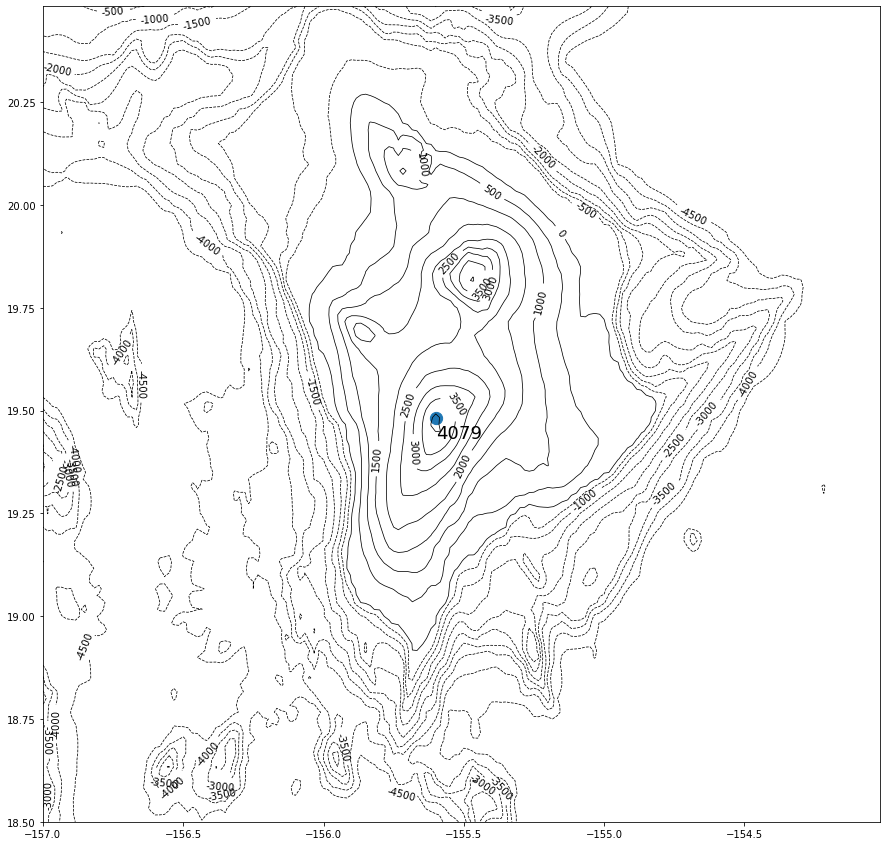

In [22]:
plt.figure(1, figsize=(15, 15))
ax = plt.subplot(111)

# Contours of Topography
cs = ax.contour(topo_hawaii.lon, topo_hawaii.lat, topo_hawaii,
                np.arange(-4500, 4500, 500), colors=['black'],
                linewidths=0.75)
ax.clabel(cs, fmt='%d')

# Add maximum point marker and text
ax.scatter(max_topo.lon, max_topo.lat, s=150)
ax.text(max_topo.lon, max_topo.lat-.05, max_topo.values.astype(int),
        fontsize=18)

plt.show()

## Exercise #1

Plot a different geographic location of interest and find a feature of interest (e.g., a maximum or minimum point)